# APS 5 - Questões com auxílio do Pandas

** Nome: Vitor Leandro Pereira ** 


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [12]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [13]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [14]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [15]:
df['Hemisfério']='none'
def CLatitude(df):
    if (df.Latitude)>0:
        return 'Norte'
    if (df.Latitude)<0:
        return 'Sul'
df['Hemisfério']=df.apply(CLatitude,axis=1)

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

(array([  1.41070000e+04,   5.65700000e+03,   1.81000000e+03,
          1.10000000e+03,   3.93000000e+02,   2.14000000e+02,
          1.04000000e+02,   1.90000000e+01,   5.00000000e+00,
          3.00000000e+00]),
 array([ 5.5 ,  5.86,  6.22,  6.58,  6.94,  7.3 ,  7.66,  8.02,  8.38,
         8.74,  9.1 ]),
 <a list of 10 Patch objects>)

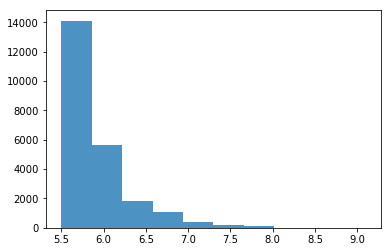

In [16]:
plt.hist(df.Magnitude,alpha=0.8)

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

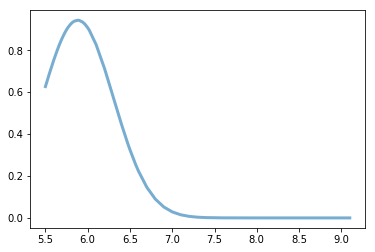

In [20]:
#expon.pdf(x, loc, scale)
import numpy as np
medMag=np.mean(df.Magnitude)
dpMag=math.sqrt(np.var(df.Magnitude))
plt.plot(sorted(df.Magnitude), stats.norm.pdf(sorted(df.Magnitude), loc=medMag, scale=dpMag), lw=3, alpha=0.6)
plt.show()

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

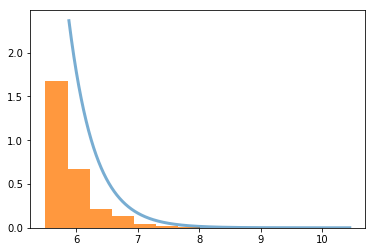

In [19]:
import numpy as np
medMag=np.mean(df.Magnitude)
dpMag=math.sqrt(np.var(df.Magnitude))
lista=sorted(stats.expon.rvs(size=len(df.Magnitude), loc=medMag, scale=dpMag))
plt.plot(lista, stats.expon.pdf(lista, loc=medMag, scale=dpMag), lw=3, alpha=0.6)
plt.hist(df.Magnitude,alpha=0.8,normed=True)

plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

Type        Earthquake  Explosion  Nuclear Explosion  Rock Burst
Hemisfério                                                      
Norte            10468          2                147           0
Sul              12763          2                 28           1


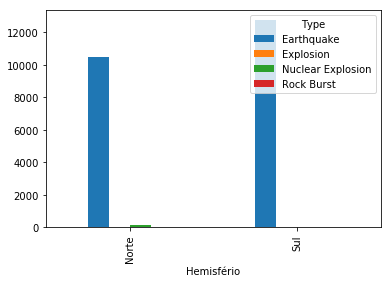

In [21]:
dados=pd.crosstab(df.Hemisfério, df.Type)
print(dados)
dados.plot(kind='bar')

### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [27]:
Norte=0
Sul=0
for i in range (len(df.Hemisfério)):
    if df.Hemisfério[i]=='Norte':
        Norte+=1
    else:
        Sul+=1
print(Norte)
print(Sul)

ProbNorte=Norte/(Norte+Sul)
print (ProbNorte)



10617
12795
0.453485392106612


Explique o seu raciocínio

Considerando as ocorrências de terremotos em cada Hemisfério, é coerente pensar que futuros terremotos devem tenter a uma mesma propabilidade desse acidente natural, baseado nos registros existentes. Por isso então, calculei a probabilidade de ocorrerem terremotos no Hemisfério norte, dividindo a quantidade de terremotos já registrados no Norte, pela quantidade total de terremotos já registrados.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [28]:
NuEx=0
NaoNuEx=0
for i in range (len(df.Type)):
    if df.Type[i]=='Nuclear Explosion':
        NuEx+=1
    else:
        NaoNuEx+=1
print(NuEx)
print(NaoNuEx)
ProbNuEx=NuEx/(NuEx+NaoNuEx)
print (ProbNuEx)

175
23237
0.007474799248248762


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

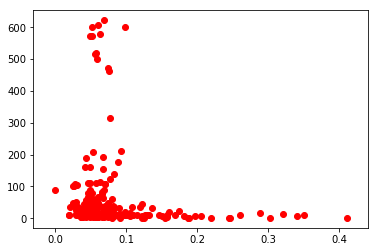

In [58]:
from numpy import arange
plt.scatter(df['Magnitude Error'],df.Depth,color='r')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [33]:
cor=df.Depth.corr(df['Magnitude Error'])
print(cor)

-0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

O valor da correlação calculado acima significa a qual a relevância e influência de um valor sobre outro, no caso entre  as variáveis Magnitude Error e Depth.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64
count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


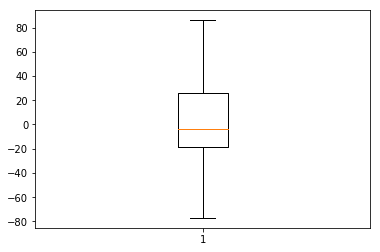

{'boxes': [<matplotlib.lines.Line2D at 0xe4e02a25c0>],
 'caps': [<matplotlib.lines.Line2D at 0xe4e02a9f98>,
 'fliers': [<matplotlib.lines.Line2D at 0xe4e02b9860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe4e02b19b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe4e02a2f28>,
  <matplotlib.lines.Line2D at 0xe4e02a9780>]}

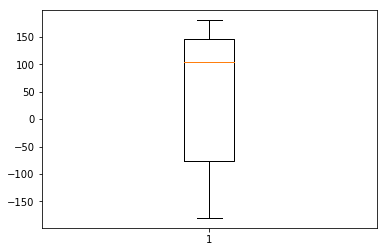

In [70]:
print(df.Latitude.describe())
print(df.Longitude.describe())
plt.boxplot(df.Latitude)
plt.show()
plt.boxplot(df.Longitude)

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [46]:
Norte=0
Sul=0
for i in range (len(df.Type)):
    if df.Type[i]=='Nuclear Explosion':
        if df.Hemisfério[i]=='Norte':
            Norte+=1
        else:
            Sul+=1
    elif df.Type[i]=='MB':
        if df.Hemisfério[i]=='Norte':
            Norte+=1
        else:
            sul+=1

ProbSul=Sul/(Sul+Norte)
ProbNorte=Norte/(Norte+Sul)
print('Com {0} ocorrências, a probabilidade de que tenha sido no Norte é {1}'.format(Norte,ProbNorte))
print('Com {0} ocorrências, a probabilidade de que tenha sido no Sul é {1}'.format(Sul,ProbSul))
print('Logo, é mais provável que tenha sido no Norte')      

Com 147 ocorrências, a probabilidade de que tenha sido no Norte é 0.84
Com 28 ocorrências, a probabilidade de que tenha sido no Sul é 0.16
Logo, é mais provável que tenha sido no Norte
